# Perceptron Algorithm

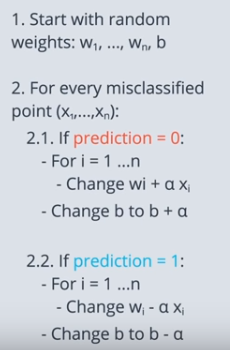

## Quiz

In [1]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        y_true = y[i]
        x = X[i]
        if y_true-y_hat == 1:
            W[0] += x[0]*learn_rate
            W[1] += x[1]*learn_rate
            b += learn_rate
        elif y_true-y_hat == -1:
            W[0] -= x[0]*learn_rate
            W[1] -= x[1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [ ]:
# X,y = load csv
lines = trainPerceptronAlgorithm(X, y)
# plot lines

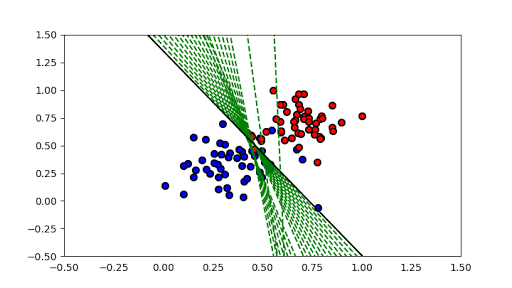

# Activation Functions

 What conditions should be met in order to apply gradient descent?
 * The error function should be differentiable
 * The error function should be continous

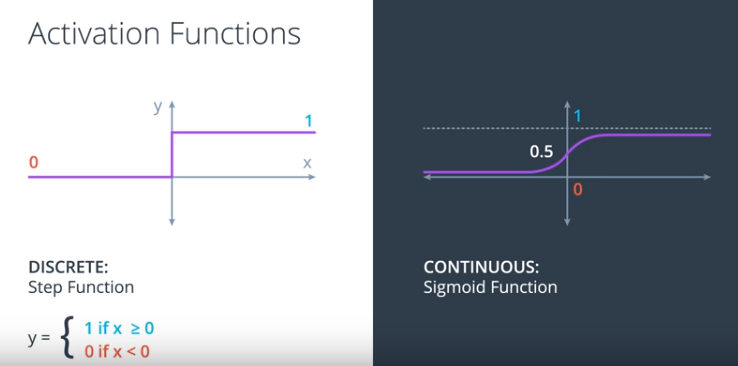

$\sigma(x) = 1/(1+e^{-x})$

In order to apply gradient desent we need a continuouse activation function.

Comparisons of the nueron using the different activation functions

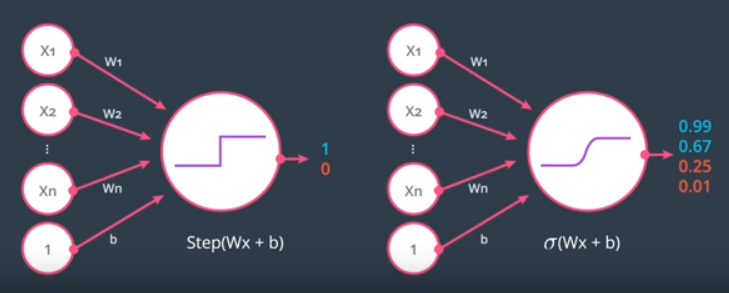

# Soft Max

Intuitivly the soft max turnes scores into probabilities.

With n classes and a linear model with z_n linear scores for each class. 

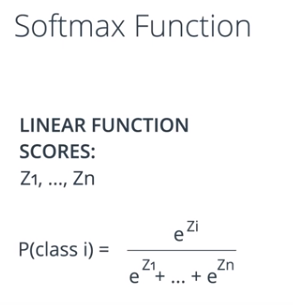

In [1]:
# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.

import numpy as np

def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL(np.exp(L))
    #     return np.divide (expL, expL.sum())


In [2]:
L=[5,6,7]
softmax(L)

[0.090030573170380462, 0.24472847105479764, 0.6652409557748219]

# One-Hot-Encoding

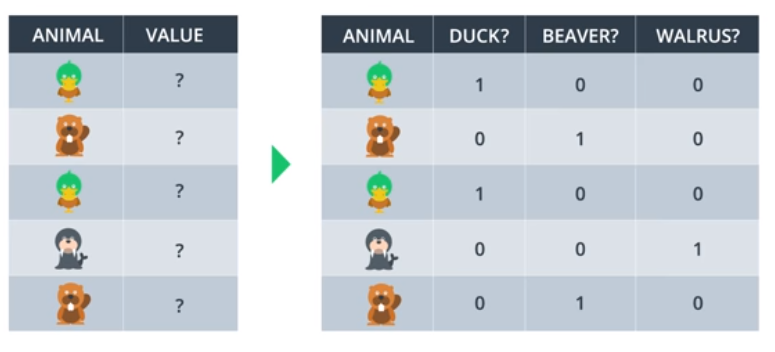

# Maximum Likelihood

Pick the model that gives the existing labels the highest probabilties

Bellow is an example: The illustration on the right maximises the likelihood.

NOTE: each event is assumed to be independant.
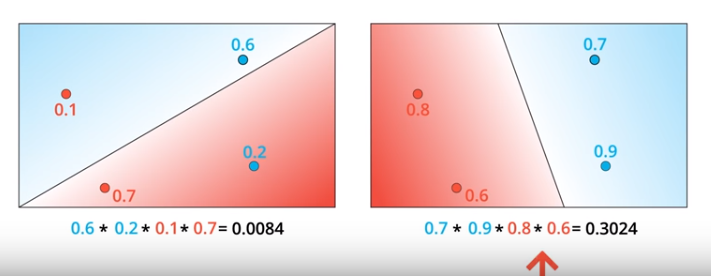

Total probability calculation for graph on the top left
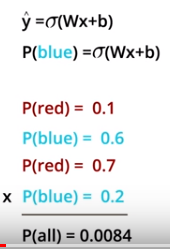

Take away: With very high values of P(all): The model classifes most points correclty iwth P(all) indicating how accurate the model is. 

# Maximizing Probabilities

Comutationally we want to add our probabilities together as it is cheaper the nmultiplying. 
The solution is to use the log identity $ log(ab) = log(a) + log(b)$

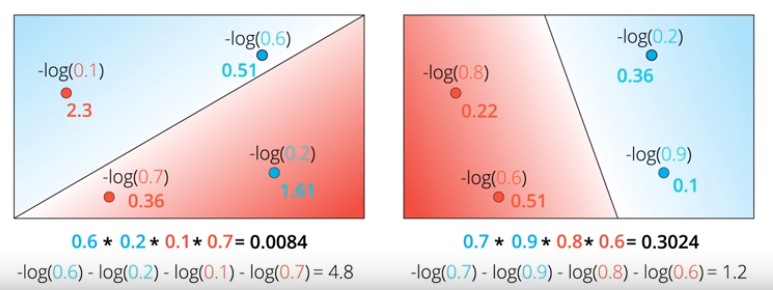

Note the above sumated results. The LHS has a lower value and the RHS has a higher value -> the RHS is the better maximum probability.

How to we maximize the probabilites?

-> Cross Entropy

In the illustration above, we can thing of the individual log values as the error for each point. 
The implication of this is that instead of maximising the probaility, we are now minimizing the cross entropy!

## Cross Entropy

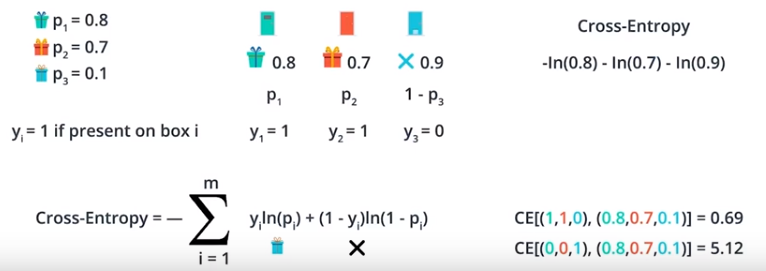

Given the following cross entropy table:
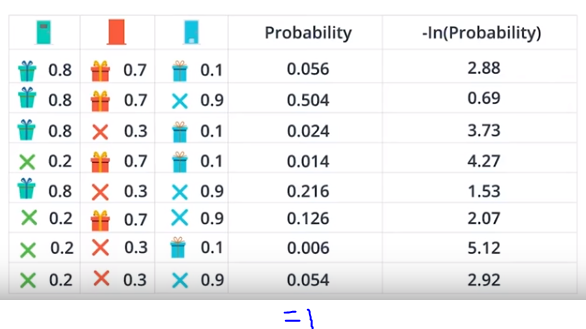

NOTE:  cross-entropy is inversely proportional to the total probability of an outcome

In [3]:
# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
import numpy as np

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

In [5]:
Y = [1, 0, 1, 1]
P = [0.4, 0.6, 0.1, 0.5]
ce = cross_entropy(Y, P)
print(ce)

4.8283137373


### Multiclass Entropy

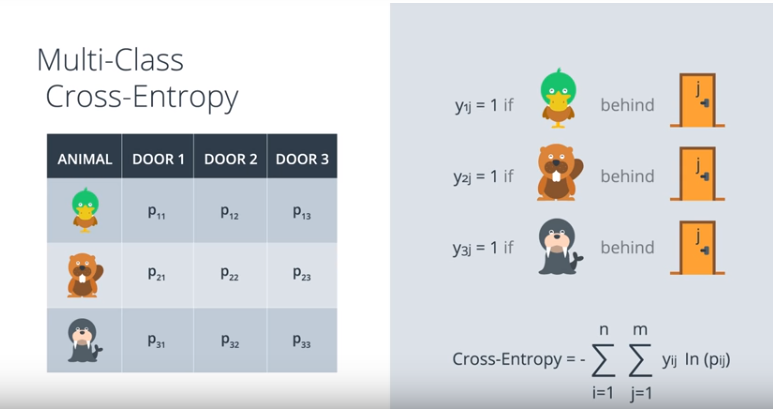

m is the number of classes and n the number of events.

# Logistic Regression

Now, we're finally ready for one of the most popular and useful algorithms in Machine Learning, and the building block of all that constitutes Deep Learning. The Logistic Regression Algorithm. And it basically goes like this:

* Take your data
* Pick a random model
* Calculate the error
* Minimize the error, and obtain a better model


## Calculating the Error Function


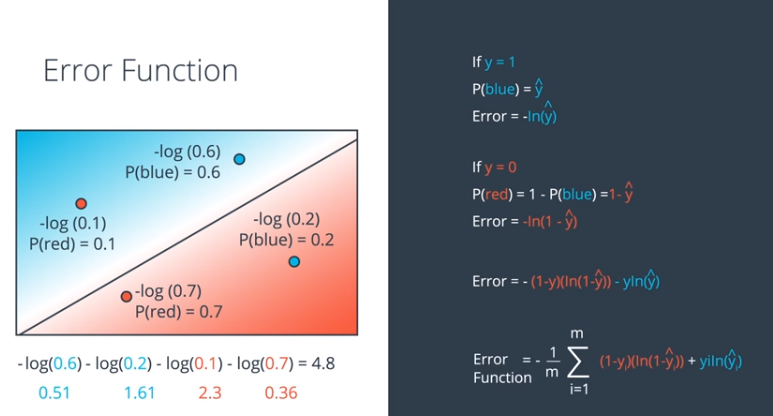

Intuition of the error function:

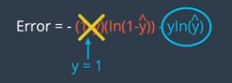

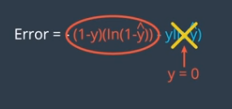

Notice that the error function can be defined w.r.t to the weigths $W$ and bias value $b$

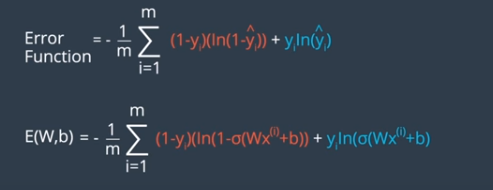

Asside note:
What was done above was for binomial/binary classification problems. For multiclass classification: 

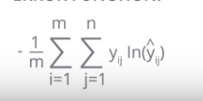

## Minimizing the error function


Given error function $E(W,b)$, we use an optimisation algorithm to find a new $E(W',b')$ which gives us $\sigma(Wx+b) \rightarrow \sigma(W'x+b')$

** Gradient Descent**

*Have a look in the udacity videos for a mathematical explanation*

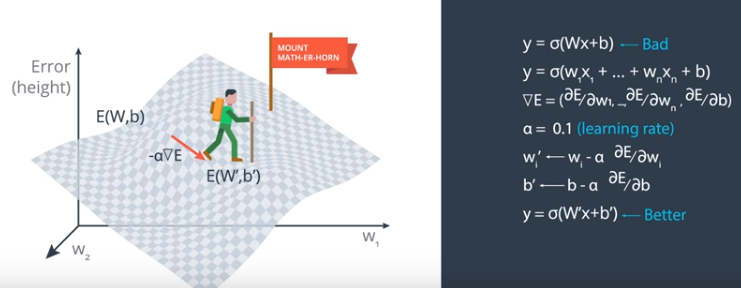

Updates the weights in the following way:

$w_i' \leftarrow w_i -\alpha [-(y - \hat{y}) x_i]$

which is equivalent to

$ w_i' \leftarrow w_i + \alpha (y - \hat{y}) x_i$

Similarly, it updates the bias in the following way:

$b' \leftarrow b + \alpha (y - \hat{y})$

Note: Since we've taken the average of the errors, the term we are adding should be $\frac{1}{m} \cdot \alpha$
instead of $\alpha$, but as $\alpha$ is a constant, then in order to simplify calculations, we'll just take $\frac{1}{m} \cdot \alpha$ to be our learning rate, and abuse the notation by just calling it $\alpha$.

** Algorithm ** 

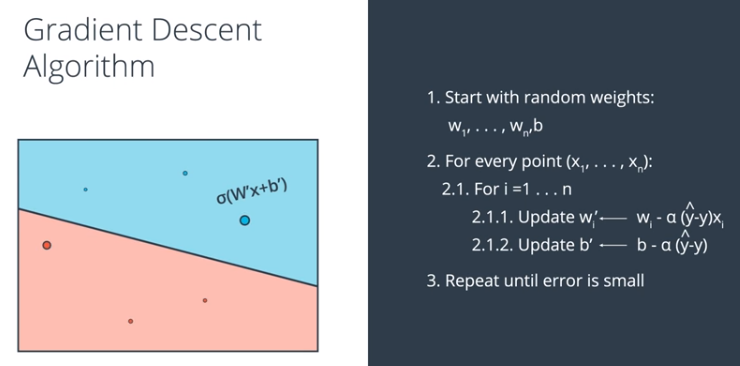

### Exercise

In [23]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def prediction(X, W, b):
    return sigmoid(np.matmul(X,W)+b)

def error_vector(y, y_hat):
    return [-y[i]*np.log(y_hat[i]) - (1-y[i])*np.log(1-y_hat[i]) for i in range(len(y))]

def error(y, y_hat):
    ev = error_vector(y, y_hat)
    return sum(ev)/len(ev)

# TODO: Fill in the code below to calculate the gradient of the error function.
# The result should be a list of three lists:
# The first list should contain the gradient (partial derivatives) with respect to w1
# The second list should contain the gradient (partial derivatives) with respect to w2
# The third list should contain the gradient (partial derivatives) with respect to b
def dErrors(X, y, y_hat):
    DErrorsDx1 = [X[i][0]*(y_hat[i]-y[i]) for i in range(len(y))]
    DErrorsDx2 = [X[i][1]*(y_hat[i]-y[i]) for i in range(len(y))]
    DErrorsDb = [(y_hat[i]-y[i]) for i in range(len(y))]
    
    return DErrorsDx1, DErrorsDx2, DErrorsDb

# TODO: Fill in the code below to implement the gradient descent step.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b.
# It should calculate the prediction, the gradients, and use them to
# update the weights and bias W, b. Then return W and b.
# The error e will be calculated and returned for you, for plotting purposes.
def gradientDescentStep(X, y, W, b, learn_rate = 0.01):
    y_hat = prediction(X,W,b)
    
    e = error(y, y_hat) 

    DErrorsDx1, DErrorsDx2, DErrorsDb = dErrors(X, y, y_hat)
    W[0] -= sum(DErrorsDx1)*learn_rate
    W[1] -= sum(DErrorsDx2)*learn_rate
    b -= sum(DErrorsDb)*learn_rate
    return W, b, e

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainLR(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    # Initialize the weights randomly
    W = np.array(np.random.rand(2,1))*2 -1
    b = np.random.rand(1)[0]*2 - 1
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the gradient descent step.
        W, b, error = gradientDescentStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        errors.append(error)
    return boundary_lines, errors


In [27]:
import pandas as pd
data = pd.read_csv("data/logistic_reg.csv",names=["x_1","x_2","y"])
X = data[["x_1","x_2"]].values
y = data["y"].values

In [31]:
y_hat = y + 1
x, xx, xxx = dErrors(X, y, y_hat)

In [29]:
#trainLR(X, y)

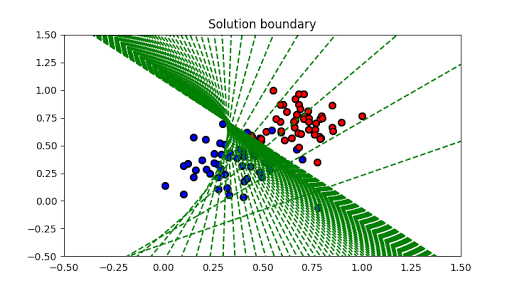

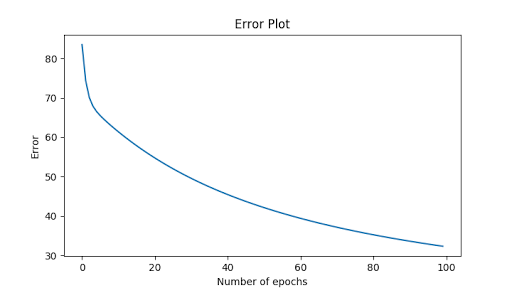

# Perceptron vs Gradient Descent